<a href="https://colab.research.google.com/github/OthonGustavo/RF_imagem/blob/main/RF_imagem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import cv2 as cv
from PIL import Image
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt


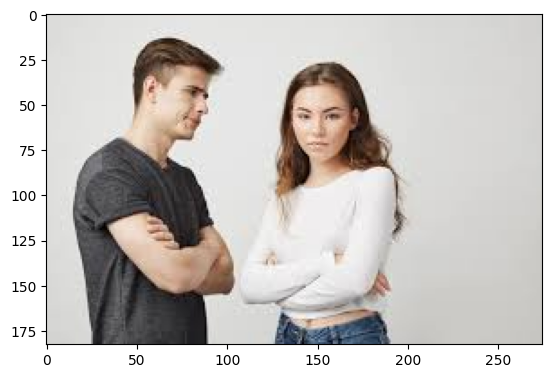

In [3]:
#RF01
image = cv.imread("/content/testeContorno.jpg")
#plt.imshow(image)
#plt.show()

image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(image)

In [4]:
#RF02
(h,w,c) = image.shape

print("Largura: {} pixels".format(w))
print("Altura: {} pixels".format(h))
print("Canais: {}".format(c))

Largura: 275 pixels
Altura: 183 pixels
Canais: 3


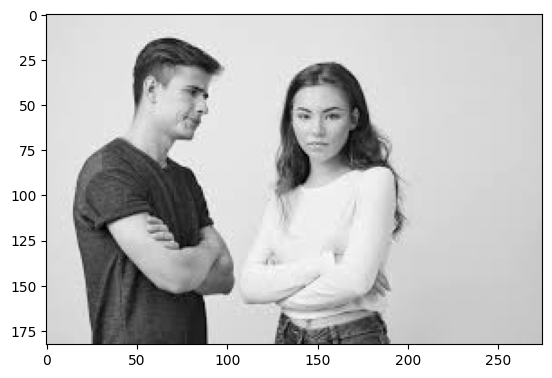

(183, 275)

In [5]:
#RF03
from skimage.color import rgb2gray

img_gray = rgb2gray(image)
plt.imshow(img_gray, cmap = "gray")
plt.show()

img_gray.shape

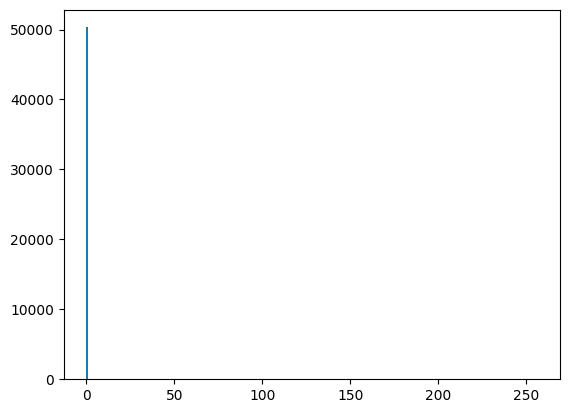

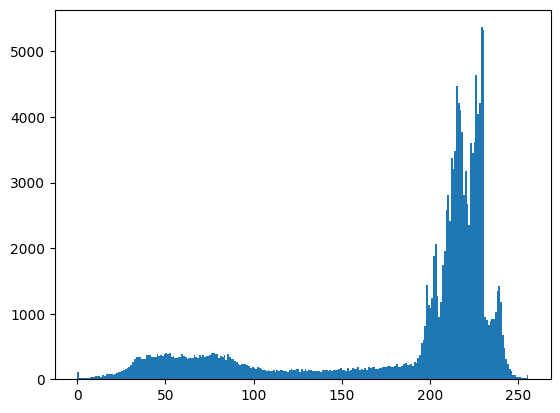

In [6]:
#RF04
plt.hist(img_gray.ravel(), bins = 256, range = [0,256])
plt.show()

plt.hist(image.ravel(), bins = 256, range = [0,256])
plt.show()

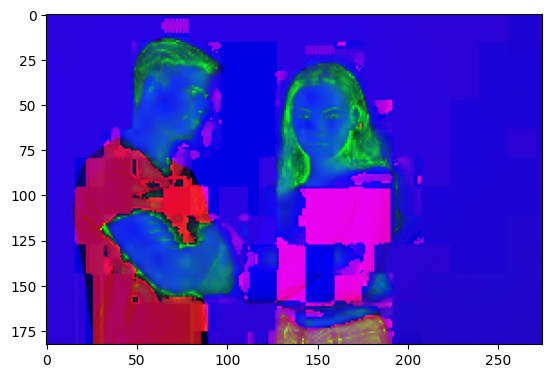

In [7]:
#RF05
from skimage.color import convert_colorspace

img_hsv = convert_colorspace(image, 'RGB', 'HSV')

plt.imshow(img_hsv)
plt.show()

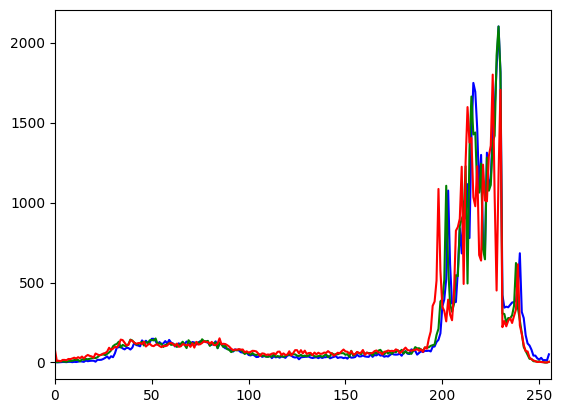

In [8]:
#RF06
color = ('b', 'g', 'r')

#plt.title()

for channel, col in enumerate(color):
  histr = cv.calcHist([image], [channel], None, [256], [0,256])
  plt.plot(histr, color = col)
  plt.xlim([0,256])
plt.show()

In [9]:
def vizinhanca4(linha, coluna):

  v1 = (linha - 1, coluna)
  v2 = (linha, coluna - 1)
  v3 = (linha + 1, coluna)
  v4 = (linha, coluna + 1)

  return [v1,v2,v3,v4]

def vizinhanca8(linha, coluna):

  v5 = (linha - 1, coluna - 1)
  v6 = (linha - 1, coluna + 1)
  v7 = (linha + 1, coluna - 1)
  v8 = (linha + 1, coluna + 1)

  vizinhanca = vizinhanca4(linha,coluna) + [v5,v6,v7,v8]
  return vizinhanca

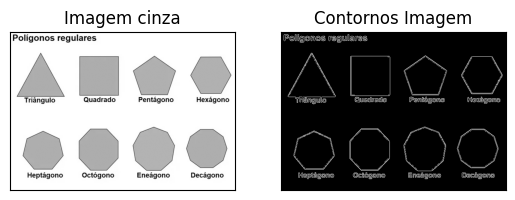

In [57]:
#RF8
image = cv.imread('/content/poligonos-regulares.webp')
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
contorno = cv.Canny(gray_image, 50, 150)

plt.subplot(121),plt.imshow(gray_image,cmap = 'gray')
plt.title('Imagem cinza'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(contorno,cmap = 'gray')
plt.title('Contornos Imagem'), plt.xticks([]), plt.yticks([])
plt.show()

Contagem de Formas:Circulo: 3
Contagem de Formas:Triangulo: 1
Contagem de Formas:Quadrado: 1
Contagem de Formas:Pentagono: 1
Contagem de Formas:Hexagono: 1
Contagem de Formas:Heptagono: 1


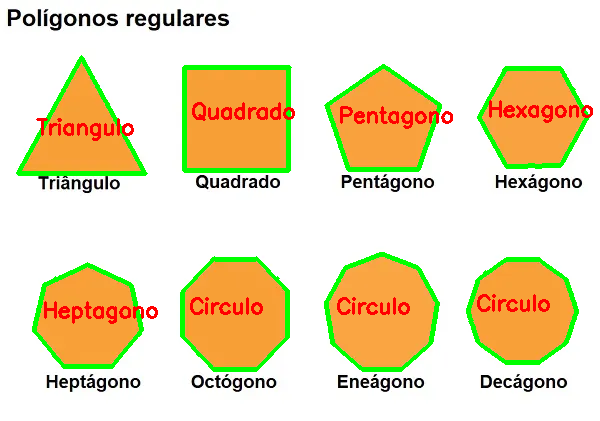

Contagem de Formas:Retangulo: 1


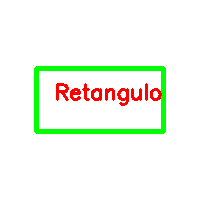

Contagem de Formas:Pentagono: 1


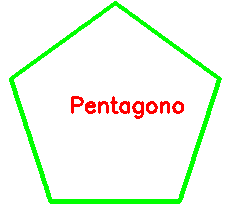

Contagem de Formas:Octogono: 1


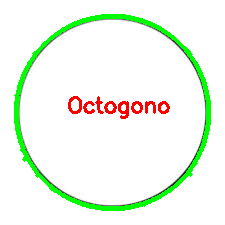

Contagem de Formas:Triangulo: 1


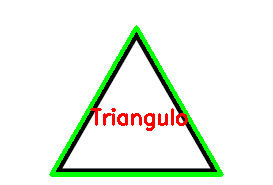

Contagem de Formas:Quadrado: 1


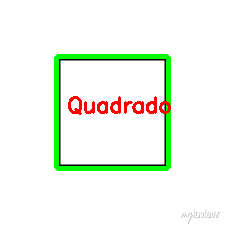

In [60]:
#RF9 e RF10
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def classificar_forma(cnt):

    perimetro = cv2.arcLength(cnt, True)
    area = cv2.contourArea(cnt)

    if perimetro == 0:
        return "Nao Identificado"

    circularidade = (4 * np.pi * area) / (perimetro ** 2)

    approx = cv2.approxPolyDP(cnt, 0.02 * perimetro, True)
    vertices = len(approx)


    if circularidade > 0.85 and vertices > 7:
        return "Circulo"

    elif vertices == 3:
        return "Triangulo"

    elif vertices == 4:
        (x, y, w, h) = cv2.boundingRect(approx)
        aspect_ratio = float(w) / h
        if 0.95 <= aspect_ratio <= 1.05:
            return "Quadrado"
        else:
            return "Retangulo"

    elif vertices == 5:
        return "Pentagono"
    elif vertices == 6:
        return "Hexagono"
    elif vertices == 7:
        return "Heptagono"
    elif vertices == 8:
        return "Octogono"
    elif vertices == 9:
        return "Eneagono"
    elif vertices == 10:
        return "Decagono"
    else:
        return f"Poligono ({vertices}v)"

def identificar_formas_abrangente(caminho_imagem):

    img = cv2.imread(caminho_imagem)
    if img is None:
        return None, None


    img_resultado = img.copy()

    img_cinza = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_blur = cv2.GaussianBlur(img_cinza, (5, 5), 0)

    _, mascara = cv2.threshold(img_cinza, 240, 255, cv2.THRESH_BINARY_INV)

    contornos, hierarquia = cv2.findContours(mascara, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

    formas_contagem = {
        "Circulo": 0,
        "Triangulo": 0,
        "Quadrado": 0,
        "Retangulo": 0,
        "Pentagono": 0,
        "Hexagono": 0,
        "Heptagono": 0,
        "Octogono": 0,
        "Eneagono": 0,
        "Decagono": 0,
        "Poligono": 0,
        "Nao Identificado": 0
    }

    for i in range(len(contornos)):
        cnt = contornos[i]
        parent = hierarquia[0][i][3]

        if parent == -1:
            area = cv2.contourArea(cnt)
            if area < 500:
                continue

            nome_forma = classificar_forma(cnt)
            if nome_forma.startswith("Poligono ("):
                formas_contagem["Poligono"] += 1
            else:
                formas_contagem[nome_forma] += 1


            cv2.drawContours(img_resultado, [cnt], -1, (0, 255, 0), 3)

            M = cv2.moments(cnt)
            if M["m00"] != 0:
                cX = int(M["m10"] / M["m00"])
                cY = int(M["m01"] / M["m00"])
            else:
                (x, y, _, _) = cv2.boundingRect(cnt)
                cX, cY = x + 20, y + 20

            cv2.putText(img_resultado, nome_forma, (cX - 45, cY),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

    return img_resultado, formas_contagem

lista_imagens = [
    "poligonos-regulares.webp",
    "retanculo.png",
    "pentagono.png",
    "ciclo.jpg",
    "triangulo.png",
    "quadrado.png"
]

for imagem_path in lista_imagens:
    resultado_imagem, contagem = identificar_formas_abrangente(imagem_path)
    if resultado_imagem is not None:
        for forma, count in contagem.items():
            if count > 0:
                print(f"Contagem de Formas:{forma}: {count}")
        cv2_imshow(resultado_imagem)
    else:
        print(f"Falha ao processar a imagem: {imagem_path}")


cv2.waitKey(0)
cv2.destroyAllWindows()

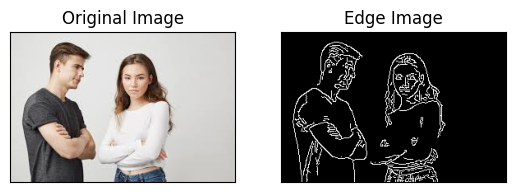

In [10]:
#RF8 da imagem 1
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

#img = cv.imread('/content/formasgeometricasBasicas.jpg', cv.IMREAD_GRAYSCALE)
img = image
assert img is not None, "file could not be read, check with os.path.exists()"
edges = cv.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [37]:
#RF11
import cv2 as cv

tamanho_normalizado = (512, 512)
imagem_normalizada = cv.resize(image, tamanho_normalizado)

print("Dimensões da Imagem Original:", image.shape)
print("Dimensões da Imagem Normalizada:", imagem_normalizada.shape)


Dimensões da Imagem Original: (183, 275, 3)
Dimensões da Imagem Normalizada: (512, 512, 3)


In [38]:
#RF12
from skimage.measure import shannon_entropy

valor_entropia = shannon_entropy(image)

print("Entropia de Shannon da imagem:", valor_entropia)

Entropia de Shannon da imagem: 6.76162180433014


In [35]:
#RF13

import numpy as np
import cv2 as cv

if len(image.shape) > 2:
  imagem_cinza = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
else:
  imagem_cinza = image

valor_variancia = np.var(imagem_cinza)

print("Variância da imagem:", valor_variancia)

Variância da imagem: 3789.536876551793


In [41]:
#RF14

from skimage.feature import graycomatrix, graycoprops
import numpy as np
import cv2 as cv

if len(image.shape) > 2:
  imagem_cinza = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
else:
  imagem_cinza = image

imagem_cinza_uint8 = imagem_cinza.astype(np.uint8)

distancias = [1]
angulos = [0, np.pi/4, np.pi/2, 3*np.pi/4]

glcm = graycomatrix(imagem_cinza_uint8, distances=distancias, angles=angulos, levels=256, symmetric=True, normed=True)

homogeneidade = graycoprops(glcm, 'homogeneity')

print("Homogeneidade (média entre ângulos):", np.mean(homogeneidade))
print("Homogeneidade (por ângulo):", homogeneidade)

Homogeneidade (média entre ângulos): 0.566600452830795
Homogeneidade (por ângulo): [[0.58184193 0.53541051 0.60582599 0.54332338]]
